1. Create a Dataset

In [1]:
import pandas as pd
import os

# --- 1. Creating the dataset dictionary ---
data = {
    "CustomerID": ["C001", "C002", "C003", "C004", "C004", "C005", "C006", "C007", "C008", "C008"],
    "Name": ["John", "Alice", "BOB", "BOBY", "Eve", "eve", "Steve", "Ramu", "mary", "Bob"],
    "Age": [25, 34, 17, 29, 29, 120, -5, None, 220, 30],
    "JoinDate": ["12/1/2024", "11/15/2023", "6/1/2022", "6/1/2022", "12/5/2024", "invalid_date", None, "1/1/2024", "3/5/2023", "3/5/2023"],
    "MonthlyCharges": [29.85, 56.95, 4000, 75.5, 75.5, 45.99, 60, 49.99, -30, 55],
    "Churn": ["No", "Yes", "No", "No", "No", "Yes", "No", None, "Yes", "No"]
}

# --- 2. Create the DataFrame ---
df = pd.DataFrame(data)

# --- 3. Define the output file path ---
output_filename = "customer_data.csv"

# --- 4. Write the DataFrame to a CSV file ---
# index=False prevents pandas from writing the DataFrame row index into the CSV file.
df.to_csv(output_filename, index=False)

# Confirmation message
print(f"Successfully created DataFrame:")
print(df)
print("-" * 30)
print(f"Data has been successfully written to '{output_filename}' in the current directory.")
print(f"Check the file path: {os.path.abspath(output_filename)}")

Successfully created DataFrame:
  CustomerID   Name    Age      JoinDate  MonthlyCharges Churn
0       C001   John   25.0     12/1/2024           29.85    No
1       C002  Alice   34.0    11/15/2023           56.95   Yes
2       C003    BOB   17.0      6/1/2022         4000.00    No
3       C004   BOBY   29.0      6/1/2022           75.50    No
4       C004    Eve   29.0     12/5/2024           75.50    No
5       C005    eve  120.0  invalid_date           45.99   Yes
6       C006  Steve   -5.0          None           60.00    No
7       C007   Ramu    NaN      1/1/2024           49.99  None
8       C008   mary  220.0      3/5/2023          -30.00   Yes
9       C008    Bob   30.0      3/5/2023           55.00    No
------------------------------
Data has been successfully written to 'customer_data.csv' in the current directory.
Check the file path: /content/customer_data.csv


In [2]:
df = pd.read_csv('/content/customer_data.csv')

In [3]:
df.describe()

,Age,MonthlyCharges
count,9.000000,10.000000
mean,55.444444,441.878000
std,70.542737,1250.560418
min,-5.000000,-30.000000
25%,25.000000,46.990000
50%,29.000000,55.975000
75%,34.000000,71.625000
max,220.000000,4000.000000


2. Find out Missing Values

In [4]:
# Finding out missing values
print("Missing values using isnull(): ")
print(df.isnull())
print("\nMissing values using isna(): ")
print(df.isna())
print("\nNon-Missing values using notna(): ")
print(df.notna())
print("\nChecking if any column has missing values using any(): ")
print(df.isnull().any())
print("\nChecking if any value is missing in the df using any(): ")
print(df.isnull().any().any())
print("Count of missing values in each column using sum(): ")
print(df.isnull().sum())

Missing values using isnull(): 
   CustomerID   Name    Age  JoinDate  MonthlyCharges  Churn
0       False  False  False     False           False  False
1       False  False  False     False           False  False
2       False  False  False     False           False  False
3       False  False  False     False           False  False
4       False  False  False     False           False  False
5       False  False  False     False           False  False
6       False  False  False      True           False  False
7       False  False   True     False           False   True
8       False  False  False     False           False  False
9       False  False  False     False           False  False

Missing values using isna(): 
   CustomerID   Name    Age  JoinDate  MonthlyCharges  Churn
0       False  False  False     False           False  False
1       False  False  False     False           False  False
2       False  False  False     False           False  False
3       False  False  

3. Visualize the missing values using msno.matrix() function.

<Axes: >

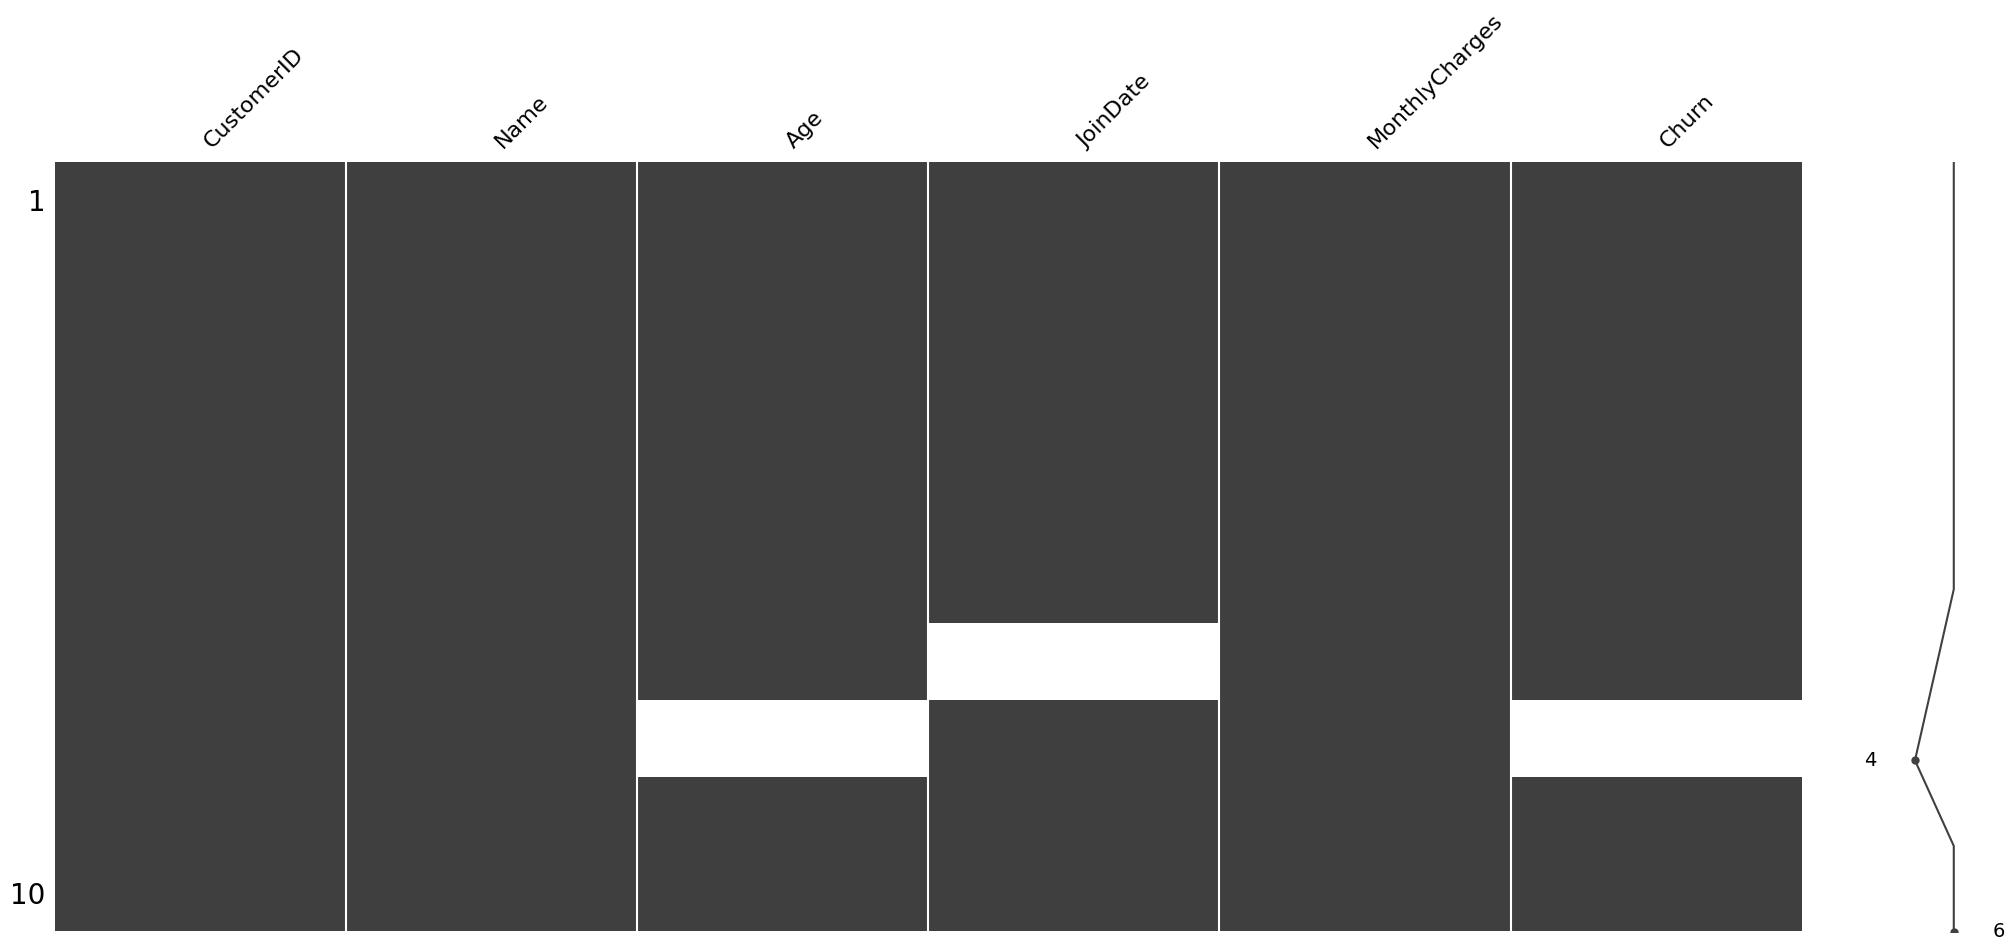

In [5]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)

4. Fill the missing values with mean, median or mode wherever necessary. And display the new dataset.

In [6]:
# Fill missing values for 'Age' and 'MonthlyCharges' using mean
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['MonthlyCharges'] = df['MonthlyCharges'].fillna(df['MonthlyCharges'].mean())

# Fill missing values for 'Churn' using mode (since it's categorical)
df['Churn'] = df['Churn'].fillna(df['Churn'].mode()[0])

# Fill missing values for 'JoinDate' using mode (since it's categorical)
df['JoinDate'] = df['JoinDate'].fillna(df['JoinDate'].mode()[0])

# Fill missing values for 'Name' using mode (since it's categorical)
df['Name'] = df['Name'].fillna(df['Name'].mode()[0])

# Display the new dataset with missing values filled
print(df.head())

df['Age'] = df['Age'].replace(-5, df['Age'].mean()) # Replace -5 with the mean of Age
df['MonthlyCharges'] = df['MonthlyCharges'].replace(-30,
df['MonthlyCharges'].mean())
df['JoinDate'] = df['JoinDate'].replace('invalid_date',
df['JoinDate'].mode()[0]) # Replace 'invalid_date' with the mode of JoinDate

# Display the new dataset with missing values filled
print(df)

  CustomerID   Name   Age    JoinDate  MonthlyCharges Churn
0       C001   John  25.0   12/1/2024           29.85    No
1       C002  Alice  34.0  11/15/2023           56.95   Yes
2       C003    BOB  17.0    6/1/2022         4000.00    No
3       C004   BOBY  29.0    6/1/2022           75.50    No
4       C004    Eve  29.0   12/5/2024           75.50    No
  CustomerID   Name         Age    JoinDate  MonthlyCharges Churn
0       C001   John   25.000000   12/1/2024          29.850    No
1       C002  Alice   34.000000  11/15/2023          56.950   Yes
2       C003    BOB   17.000000    6/1/2022        4000.000    No
3       C004   BOBY   29.000000    6/1/2022          75.500    No
4       C004    Eve   29.000000   12/5/2024          75.500    No
5       C005    eve  120.000000    3/5/2023          45.990   Yes
6       C006  Steve   55.444444    3/5/2023          60.000    No
7       C007   Ramu   55.444444    1/1/2024          49.990    No
8       C008   mary  220.000000    3/5/2023   

5. Display the unique names.

In [7]:
unique_names = df['Name'].unique()
print("Unique names in the 'Name' column:")
print(unique_names)

Unique names in the 'Name' column:
['John' 'Alice' 'BOB' 'BOBY' 'Eve' 'eve' 'Steve' 'Ramu' 'mary' 'Bob']


6. Identify the duplicated row with reference to the attribute “CustomerID” and remove the duplicated row.

In [8]:
duplicated_rows = df[df.duplicated(subset='CustomerID', keep=False)]

# Display the duplicated rows
print("Duplicated rows based on 'CustomerID':")
print(duplicated_rows)

# Remove duplicated rows
df = df.drop_duplicates(subset='CustomerID', keep='first')

# Display the updated and cleaned dataset
print("\nUpdated and cleaned dataset:")
print(df)

Duplicated rows based on 'CustomerID':
  CustomerID  Name    Age   JoinDate  MonthlyCharges Churn
3       C004  BOBY   29.0   6/1/2022          75.500    No
4       C004   Eve   29.0  12/5/2024          75.500    No
8       C008  mary  220.0   3/5/2023         441.878   Yes
9       C008   Bob   30.0   3/5/2023          55.000    No

Updated and cleaned dataset:
  CustomerID   Name         Age    JoinDate  MonthlyCharges Churn
0       C001   John   25.000000   12/1/2024          29.850    No
1       C002  Alice   34.000000  11/15/2023          56.950   Yes
2       C003    BOB   17.000000    6/1/2022        4000.000    No
3       C004   BOBY   29.000000    6/1/2022          75.500    No
5       C005    eve  120.000000    3/5/2023          45.990   Yes
6       C006  Steve   55.444444    3/5/2023          60.000    No
7       C007   Ramu   55.444444    1/1/2024          49.990    No
8       C008   mary  220.000000    3/5/2023         441.878   Yes
